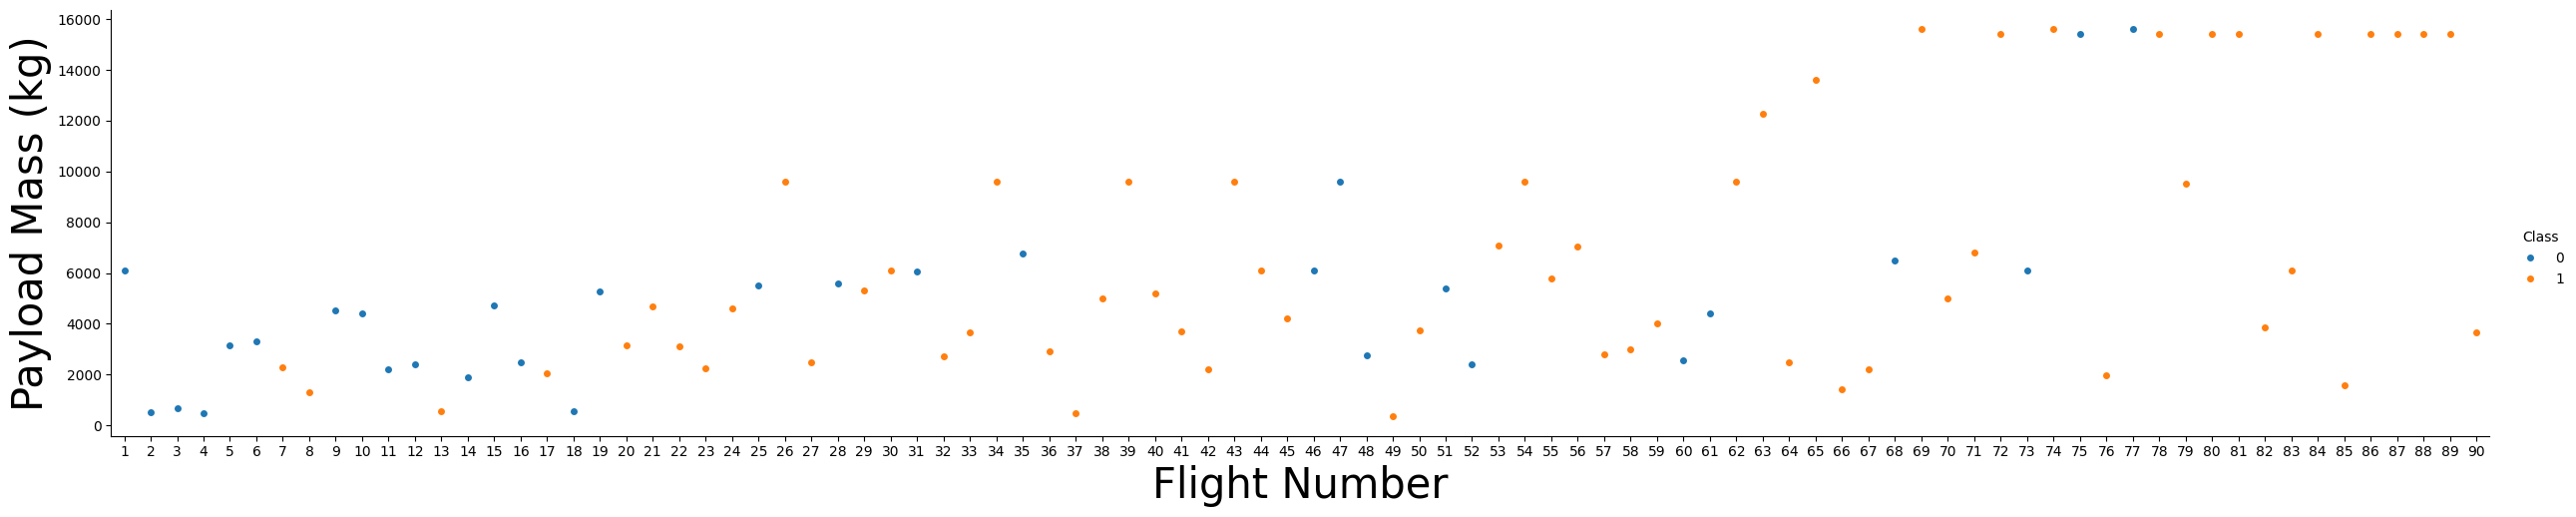

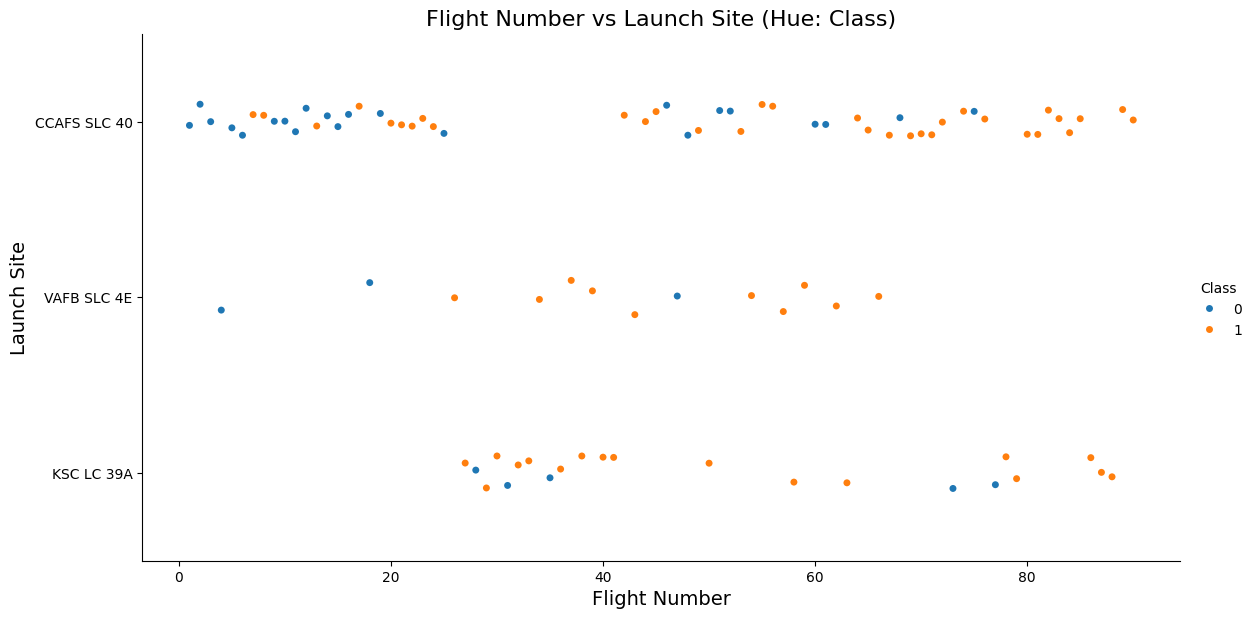

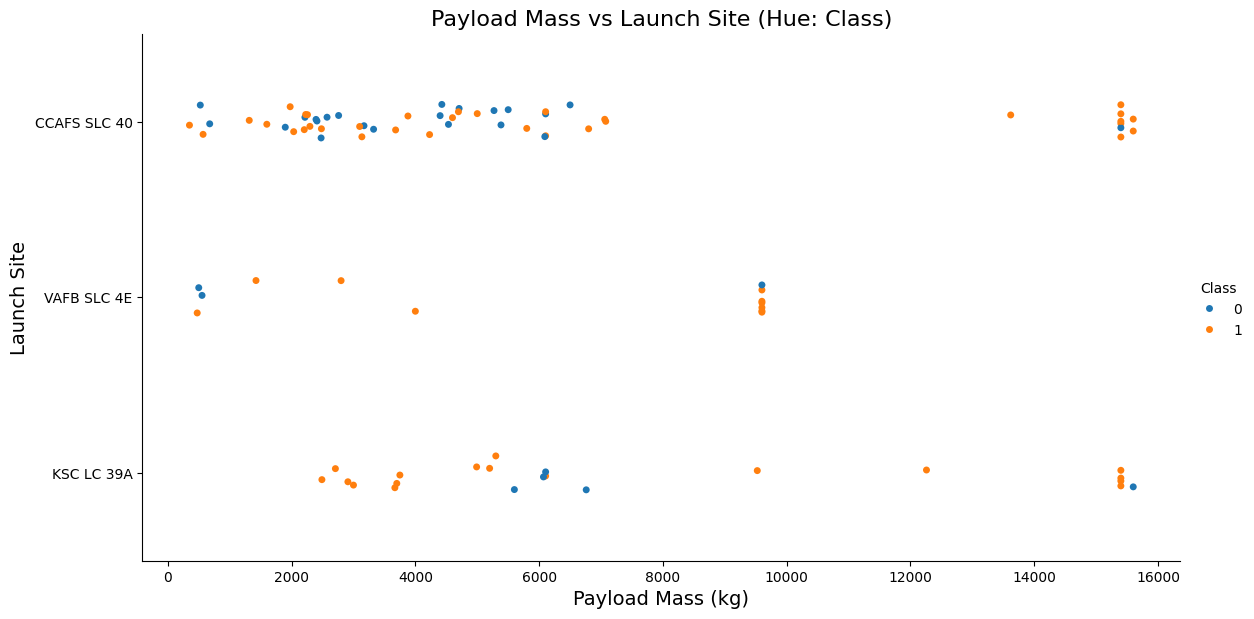

C:\Users\nteny\AppData\Local\Temp\ipykernel_20784\2743119555.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='viridis')


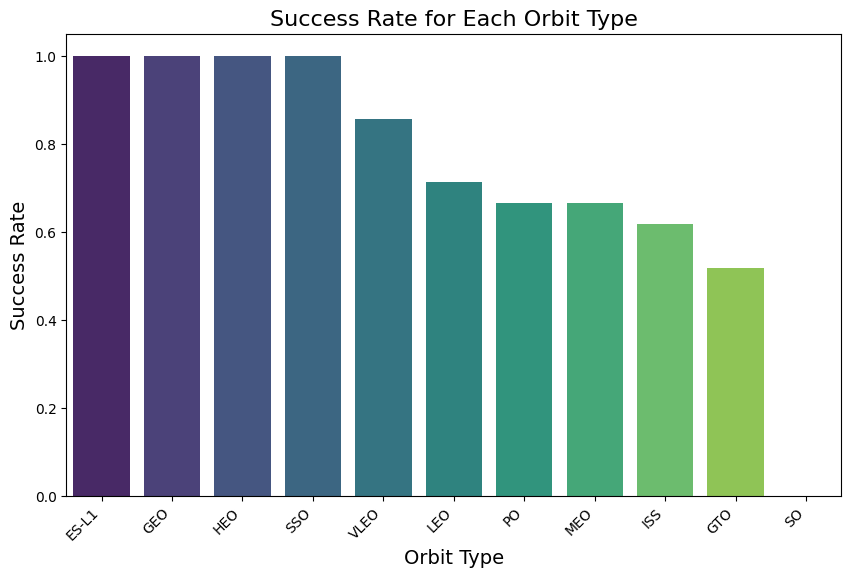

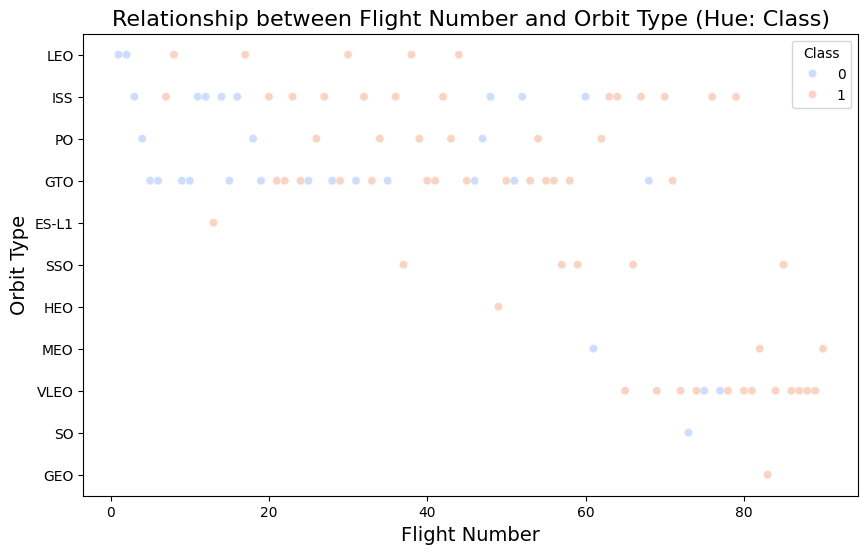

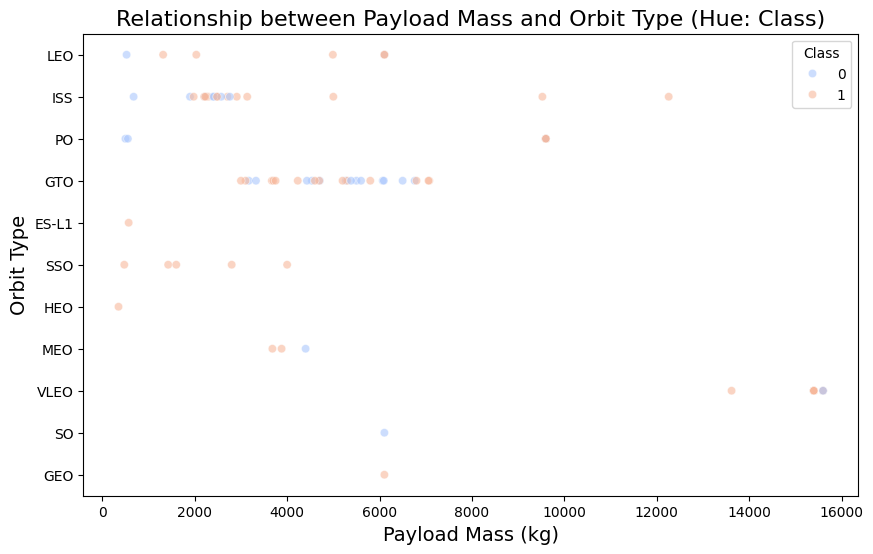

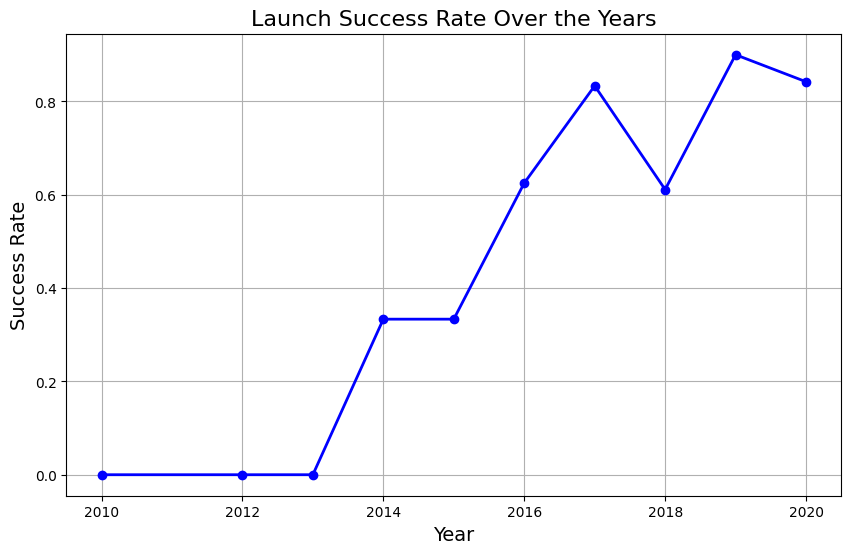

In [15]:
# Install necessary libraries (use pip in local environments)
!pip install numpy pandas seaborn matplotlib

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL to the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Read dataset into pandas DataFrame
df = pd.read_csv(URL)

# Display the first 5 rows of the dataframe
df.head(5)

# Create a seaborn categorical plot
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)

# Set the labels for the axes
plt.xlabel("Flight Number", fontsize=30)
plt.ylabel("Payload Mass (kg)", fontsize=30)

# Display the plot
plt.show()

# Create the catplot to visualize the relationship between FlightNumber and LaunchSite
sns.catplot(
    x="FlightNumber",  # x-axis is Flight Number
    y="LaunchSite",    # y-axis is Launch Site
    hue="Class",       # hue is the Class column (Success/Failure)
    data=df,           # Data for the plot
    kind="strip",      # type of plot, "strip" will give us a scatter-like plot
    jitter=True,       # Adds some jitter to avoid overlapping points
    aspect=2,          # Makes the plot wider to view better
    height=6           # Controls the overall height of the plot
)

# Add labels and title
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site (Hue: Class)", fontsize=16)

# Display the plot
plt.show() 

# Create the catplot to visualize the relationship between Payload Mass and Launch Site
sns.catplot(
    x="PayloadMass",  # x-axis is Payload Mass (kg)
    y="LaunchSite",    # y-axis is Launch Site
    hue="Class",       # hue is Class (Success/Failure)
    data=df,           # Data for the plot
    kind="strip",      # "strip" gives us a scatter-like plot
    jitter=True,       # Adds some jitter to avoid overlapping points
    aspect=2,          # Makes the plot wider for better visibility
    height=6           # Controls the height of the plot
)

# Add labels and title
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site (Hue: Class)", fontsize=16)

# Display the plot
plt.show() 



# Group by 'Orbit' and calculate the mean of 'Class' to get the success rate for each orbit type
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Sort the data by success rate in descending order for better visualization
orbit_success_rate = orbit_success_rate.sort_values('Class', ascending=False)

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='Orbit', y='Class', data=orbit_success_rate, palette='viridis')

# Add labels and title
plt.xlabel("Orbit Type", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Success Rate for Each Orbit Type", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show() 


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# URL to the dataset
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

# Read the dataset into a pandas DataFrame
df = pd.read_csv(URL)

# Create the scatter plot to visualize the relationship between FlightNumber and Orbit
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="FlightNumber",  # x-axis: FlightNumber
    y="Orbit",         # y-axis: Orbit type
    hue="Class",       # hue: Class (Success or Failure)
    data=df,           # Data to use
    palette="coolwarm", # Color palette for Success (1) and Failure (0)
    alpha=0.6          # Transparency of points for better visibility
)

# Add labels and title
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Relationship between Flight Number and Orbit Type (Hue: Class)", fontsize=16)

# Show the plot
plt.show()  

# Create the scatter plot to visualize the relationship between Payload Mass and Orbit
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="PayloadMass",  # x-axis: Payload Mass
    y="Orbit",         # y-axis: Orbit type
    hue="Class",       # hue: Class (Success or Failure)
    data=df,           # Data to use
    palette="coolwarm", # Color palette for Success (1) and Failure (0)
    alpha=0.6          # Transparency of points for better visibility
)

# Add labels and title
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
plt.title("Relationship between Payload Mass and Orbit Type (Hue: Class)", fontsize=16)

# Show the plot
plt.show()


# Extract the year from the 'Date' column and create a new 'Year' column
def Extract_year():
    year = []
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

# Apply the Extract_year function to get the year
df['Year'] = Extract_year()

# Convert 'Year' column to numeric (in case it is stored as string)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Calculate the success rate per year
success_rate_per_year = df.groupby('Year')['Class'].mean()

# Plot the success rate over the years
plt.figure(figsize=(10, 6))
success_rate_per_year.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)

# Add labels and title
plt.xlabel("Year", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
plt.title("Launch Success Rate Over the Years", fontsize=16)
plt.grid(True)

# Show the plot
plt.show() 

# Create a list of categorical columns that we want to apply OneHotEncoding to
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Apply OneHotEncoding using pd.get_dummies
features_one_hot = pd.get_dummies(df, columns=categorical_columns)

# Display the first few rows of the encoded dataframe
features_one_hot.head() 

# First, ensure that we have identified all numeric columns
numeric_columns = features_one_hot.select_dtypes(include=['number']).columns

# Now, cast only the numeric columns to 'float64'
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

# Export the DataFrame to a CSV file
features_one_hot.to_csv('dataset_part_3.csv', index=False)

